
#   Reindexing and Altering Labels

## Table of Contents 

* [Reindexing to align with another object](#reindexing_to_align_with_another_object)
* [Aligning objects with each other with ](#aligning_objects_with_each_other_with_)
* [Filling while reindexing](#filling_while_reindexing)
* [Limits on filling while reindexing](#limits_on_filling_while_reindexing)
* [Dropping labels from an axis](#dropping_labels_from_an_axis)
* [Renaming / mapping labels](#renaming_/_mapping_labels)

---

In [1]:
import pandas as pd
import numpy as np

[`reindex()`](../reference/api/pandas.Series.reindex.html#pandas.Series.reindex "pandas.Series.reindex") is the fundamental data alignment method in pandas.
It is used to implement nearly all other features relying on label-alignment
functionality. To *reindex* means to conform the data to match a given set of
labels along a particular axis. This accomplishes several things:

Here is a simple example:

In [2]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.168678
b    1.802621
c   -0.053732
d    1.068352
e    0.991618
dtype: float64

In [3]:
s.reindex(["e", "b", "f", "d"])

e    0.991618
b    1.802621
f         NaN
d    1.068352
dtype: float64

Here, the `f` label was not contained in the Series and hence appears as
`NaN` in the result.

With a DataFrame, you can simultaneously reindex the index and columns:

In [7]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)

df

,one,two,three
a,-0.494183,1.502644,NaN
b,-0.509906,-0.293808,0.945491
c,1.525737,1.158806,-0.013921
d,NaN,-0.558905,-0.960371


In [8]:
df.reindex(index=["c", "f", "b"], columns=["three", "two", "one"])

,three,two,one
c,-0.013921,1.158806,1.525737
f,NaN,NaN,NaN
b,0.945491,-0.293808,-0.509906


You may also use `reindex` with an `axis` keyword:

In [ ]:
df.reindex(["c", "f", "b"], axis="index")

Note that the `Index` objects containing the actual axis labels can be
**shared** between objects. So if we have a Series and a DataFrame, the
following can be done:

In [9]:
rs = s.reindex(df.index)

In [10]:
rs

a    0.168678
b    1.802621
c   -0.053732
d    1.068352
dtype: float64

In [11]:
rs.index is df.index

True

This means that the reindexed Series’s index is the same Python object as the
DataFrame’s index.

[`DataFrame.reindex()`](../reference/api/pandas.DataFrame.reindex.html#pandas.DataFrame.reindex "pandas.DataFrame.reindex") also supports an “axis-style” calling convention,
where you specify a single `labels` argument and the `axis` it applies to.

In [12]:
df.reindex(["c", "f", "b"], axis="index")

,one,two,three
c,1.525737,1.158806,-0.013921
f,NaN,NaN,NaN
b,-0.509906,-0.293808,0.945491


In [13]:
df.reindex(["three", "two", "one"], axis="columns")

,three,two,one
a,NaN,1.502644,-0.494183
b,0.945491,-0.293808,-0.509906
c,-0.013921,1.158806,1.525737
d,-0.960371,-0.558905,NaN


> See also:
> 
> [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced) is an even more concise way of
doing reindexing.

> Note
>
> When writing performance-sensitive code, there is a good reason to spend
some time becoming a reindexing ninja: **many operations are faster on
pre-aligned data**. Adding two unaligned DataFrames internally triggers a
reindexing step. For exploratory analysis you will hardly notice the
difference (because `reindex` has been heavily optimized), but when CPU
cycles matter sprinkling a few explicit `reindex` calls here and there can
have an impact.

<a class="anchor" id="reindexing_to_align_with_another_object"></a>
## Reindexing to align with another object

You may wish to take an object and reindex its axes to be labeled the same as
another object. While the syntax for this is straightforward albeit verbose, it
is a common enough operation that the [`reindex_like()`](../reference/api/pandas.DataFrame.reindex_like.html#pandas.DataFrame.reindex_like "pandas.DataFrame.reindex_like") method is
available to make this simpler:

In [22]:
df

,one,two,three
a,-0.494183,1.502644,NaN
b,-0.509906,-0.293808,0.945491
c,1.525737,1.158806,-0.013921
d,NaN,-0.558905,-0.960371


In [25]:
df2 = df.reindex(index=['c', 'b', 'e', 'f'], columns=['one'])

In [26]:
df2

,one
c,1.525737
b,-0.509906
e,NaN
f,NaN


In [27]:
df.reindex_like(df2)

,one
c,1.525737
b,-0.509906
e,NaN
f,NaN


<a class="anchor" id="aligning_objects_with_each_other_with_"></a>
## Aligning objects with each other with 

The [`align()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.align.html#pandas.Series.align) method is the fastest way to simultaneously align two objects. It
supports a `join` argument

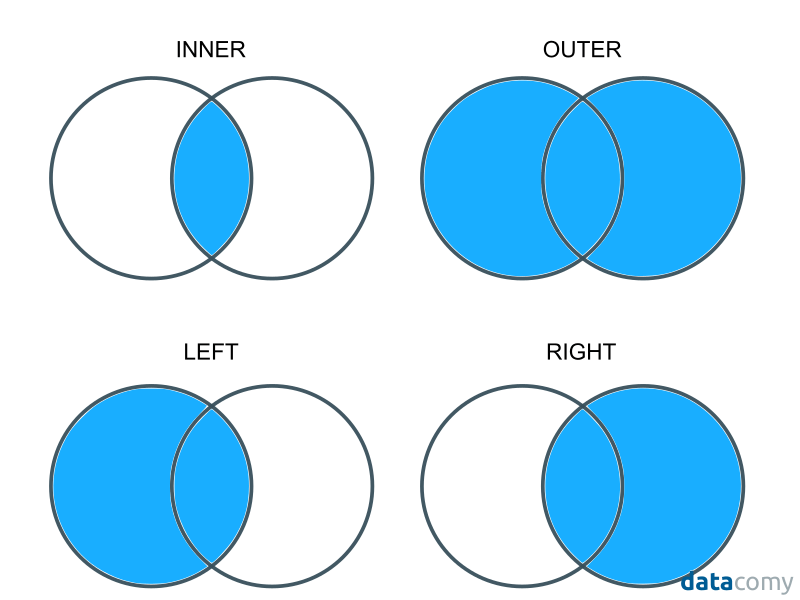

> 
> * `join='outer'`: take the union of the indexes (default)
> * `join='left'`: use the calling object’s index
> * `join='right'`: use the passed object’s index
> * `join='inner'`: intersect the indexes
> 
> 
>

It returns a tuple with both of the reindexed Series:

In [28]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [31]:
s1 = s[:4]
s1

a   -0.536209
b   -0.358354
c    0.446563
d    0.786646
dtype: float64

In [32]:
s2 = s[1:]
s2

b   -0.358354
c    0.446563
d    0.786646
e   -0.898076
dtype: float64

In [33]:
s1.align(s2)

(a   -0.536209
 b   -0.358354
 c    0.446563
 d    0.786646
 e         NaN
 dtype: float64,
 a         NaN
 b   -0.358354
 c    0.446563
 d    0.786646
 e   -0.898076
 dtype: float64)

In [34]:
s1.align(s2, join="inner")

(b   -0.358354
 c    0.446563
 d    0.786646
 dtype: float64,
 b   -0.358354
 c    0.446563
 d    0.786646
 dtype: float64)

In [35]:
s1.align(s2, join="left")

(a   -0.536209
 b   -0.358354
 c    0.446563
 d    0.786646
 dtype: float64,
 a         NaN
 b   -0.358354
 c    0.446563
 d    0.786646
 dtype: float64)

For DataFrames, the join method will be applied to both the index and the
columns by default:

In [40]:
df

,one,two,three
a,-0.494183,1.502644,NaN
b,-0.509906,-0.293808,0.945491
c,1.525737,1.158806,-0.013921
d,NaN,-0.558905,-0.960371


In [41]:
df2

,one
c,1.525737
b,-0.509906
e,NaN
f,NaN


In [36]:
df.align(df2, join="inner")

(        one
 b -0.509906
 c  1.525737,
         one
 b -0.509906
 c  1.525737)

You can also pass an `axis` option to only align on the specified axis:

In [37]:
df.align(df2, join="inner", axis=0)

(        one       two     three
 b -0.509906 -0.293808  0.945491
 c  1.525737  1.158806 -0.013921,
         one
 b -0.509906
 c  1.525737)

If you pass a Series to [`DataFrame.align()`](../reference/api/pandas.DataFrame.align.html#pandas.DataFrame.align "pandas.DataFrame.align"), you can choose to align both
objects either on the DataFrame’s index or columns using the `axis` argument:

In [42]:
df

,one,two,three
a,-0.494183,1.502644,NaN
b,-0.509906,-0.293808,0.945491
c,1.525737,1.158806,-0.013921
d,NaN,-0.558905,-0.960371


In [43]:
df2

,one
c,1.525737
b,-0.509906
e,NaN
f,NaN


In [44]:
df.align(df2.iloc[0], axis=1)

(        one     three       two
 a -0.494183       NaN  1.502644
 b -0.509906  0.945491 -0.293808
 c  1.525737 -0.013921  1.158806
 d       NaN -0.960371 -0.558905,
 one      1.525737
 three         NaN
 two           NaN
 Name: c, dtype: float64)

<a class="anchor" id="filling_while_reindexing"></a>
## Filling while reindexing

[`reindex()`](../reference/api/pandas.Series.reindex.html#pandas.Series.reindex "pandas.Series.reindex") takes an optional parameter `method` which is a
filling method chosen from the following table:

We illustrate these fill methods on a simple Series:

In [45]:
rng = pd.date_range("1/3/2000", periods=8)

In [46]:
ts = pd.Series(np.random.randn(8), index=rng)

In [47]:
ts2 = ts[[0, 3, 6]]

In [48]:
ts

2000-01-03    0.540217
2000-01-04    1.301152
2000-01-05   -0.324090
2000-01-06   -0.801851
2000-01-07    0.220381
2000-01-08    0.910936
2000-01-09   -1.770761
2000-01-10   -1.255012
Freq: D, dtype: float64

In [49]:
ts2

2000-01-03    0.540217
2000-01-06   -0.801851
2000-01-09   -1.770761
Freq: 3D, dtype: float64

In [50]:
ts2.reindex(ts.index)

2000-01-03    0.540217
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.801851
2000-01-07         NaN
2000-01-08         NaN
2000-01-09   -1.770761
2000-01-10         NaN
Freq: D, dtype: float64

In [51]:
ts2.reindex(ts.index, method="ffill")

2000-01-03    0.540217
2000-01-04    0.540217
2000-01-05    0.540217
2000-01-06   -0.801851
2000-01-07   -0.801851
2000-01-08   -0.801851
2000-01-09   -1.770761
2000-01-10   -1.770761
Freq: D, dtype: float64

In [52]:
ts2.reindex(ts.index, method="bfill")

2000-01-03    0.540217
2000-01-04   -0.801851
2000-01-05   -0.801851
2000-01-06   -0.801851
2000-01-07   -1.770761
2000-01-08   -1.770761
2000-01-09   -1.770761
2000-01-10         NaN
Freq: D, dtype: float64

In [53]:
ts2.reindex(ts.index, method="nearest")

2000-01-03    0.540217
2000-01-04    0.540217
2000-01-05   -0.801851
2000-01-06   -0.801851
2000-01-07   -0.801851
2000-01-08   -1.770761
2000-01-09   -1.770761
2000-01-10   -1.770761
Freq: D, dtype: float64

These methods require that the indexes are **ordered** increasing or
decreasing.

Note that the same result could have been achieved using
[fillna](missing_data.html#missing-data-fillna) (except for `method='nearest'`) or
[interpolate](missing_data.html#missing-data-interpolate):

In [54]:
ts2.reindex(ts.index).fillna(method="ffill")

2000-01-03    0.540217
2000-01-04    0.540217
2000-01-05    0.540217
2000-01-06   -0.801851
2000-01-07   -0.801851
2000-01-08   -0.801851
2000-01-09   -1.770761
2000-01-10   -1.770761
Freq: D, dtype: float64

[`reindex()`](../reference/api/pandas.Series.reindex.html#pandas.Series.reindex "pandas.Series.reindex") will raise a ValueError if the index is not monotonically
increasing or decreasing. [`fillna()`](../reference/api/pandas.Series.fillna.html#pandas.Series.fillna "pandas.Series.fillna") and [`interpolate()`](../reference/api/pandas.Series.interpolate.html#pandas.Series.interpolate "pandas.Series.interpolate")
will not perform any checks on the order of the index.

<a class="anchor" id="dropping_labels_from_an_axis"></a>
## Dropping labels from an axis

A method closely related to `reindex` is the [`drop()`](../reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop "pandas.DataFrame.drop") function.
It removes a set of labels from an axis:

In [55]:
df

,one,two,three
a,-0.494183,1.502644,NaN
b,-0.509906,-0.293808,0.945491
c,1.525737,1.158806,-0.013921
d,NaN,-0.558905,-0.960371


In [56]:
df.drop(["a", "d"], axis=0)

,one,two,three
b,-0.509906,-0.293808,0.945491
c,1.525737,1.158806,-0.013921


In [57]:
df.drop(["one"], axis=1)

,two,three
a,1.502644,NaN
b,-0.293808,0.945491
c,1.158806,-0.013921
d,-0.558905,-0.960371
